Признаки:
Количественные
Категориальные - количество ограничено (более двух)
Бинарные

Графики для исследования:
По-одному признаку: колич, катего
Взаимосвязи признаков: 

Остальное
t-SNE: проекция многомерного пространства в 2d/3d

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('../../data/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Признаки по-одному
## 1.1 Количественные признаки

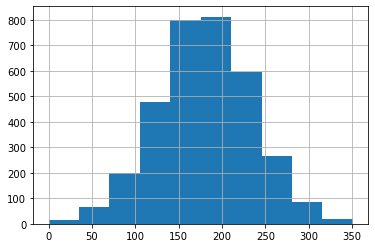

In [9]:
df['Total day minutes'].hist();

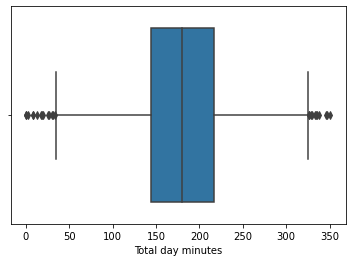

In [10]:
sns.boxplot(df['Total day minutes']);

# 1.2. Категориальные признаки

In [15]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OR     78
Name: State, dtype: int64

In [16]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

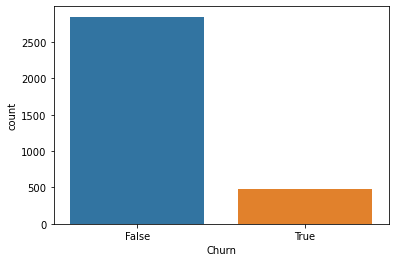

In [18]:
sns.countplot(df['Churn']);

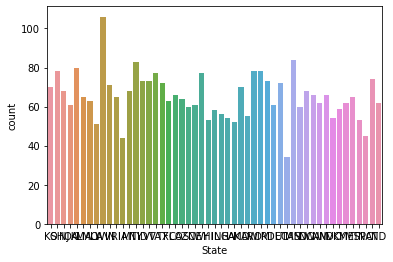

In [19]:
sns.countplot(df['State']);

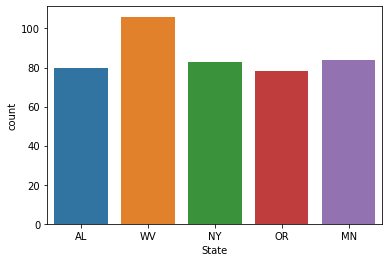

In [25]:
sns.countplot(df[df['State'].\
                 isin(df['State'].value_counts().head().index)]['State']);

# Взаимодействия
## 2.1 Количественные-количественные

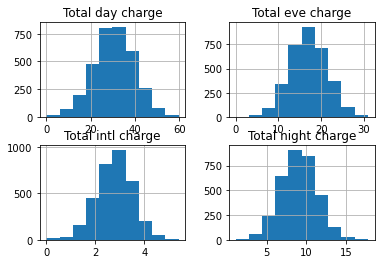

In [28]:
feat = [f for f in df.columns if 'charge' in f]

df[feat].hist();

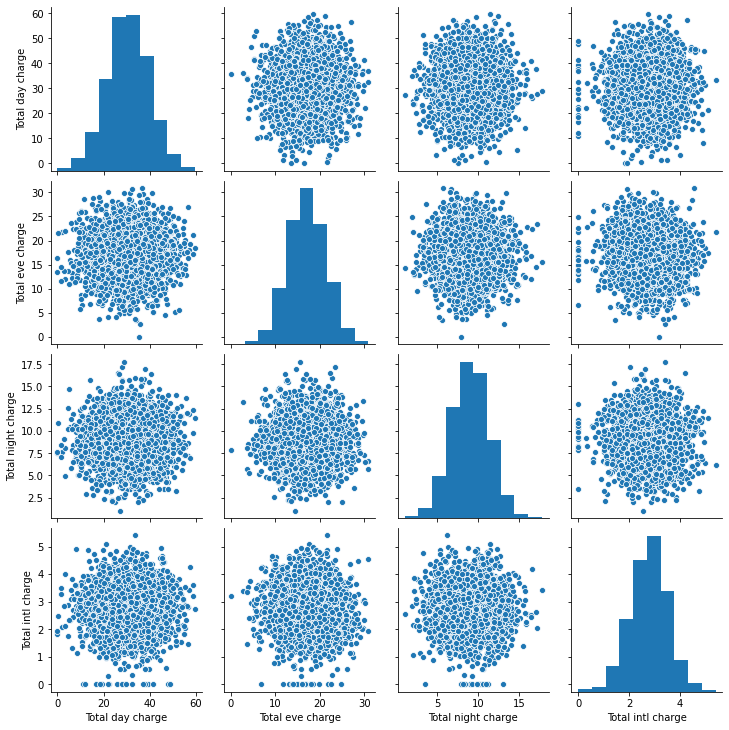

In [29]:
sns.pairplot(df[feat]);

In [39]:
df['Churn'].map({False: 'blue', True: 'orange'})

0       blue
1       blue
2       blue
3       blue
4       blue
        ... 
3328    blue
3329    blue
3330    blue
3331    blue
3332    blue
Name: Churn, Length: 3333, dtype: object

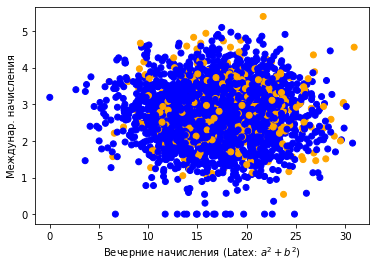

In [41]:
plt.scatter(df['Total eve charge'], df['Total intl charge'],
           color=df['Churn'].map({False: 'blue', True: 'orange'}));
plt.xlabel('Вечерние начисления (Latex: $a^2 + b^2$)');
plt.ylabel('Междунар. начисления');

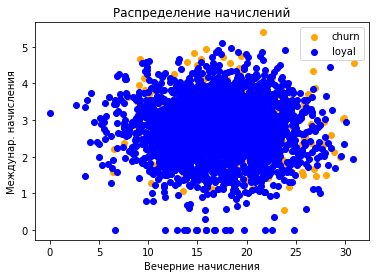

In [46]:
plt.scatter(df[df['Churn']]['Total eve charge'], 
            df[df['Churn']]['Total intl charge'],
           color='orange', label='churn');
plt.scatter(df[~df['Churn']]['Total eve charge'], 
            df[~df['Churn']]['Total intl charge'],
           color='blue', label='loyal');

plt.xlabel('Вечерние начисления');
plt.ylabel('Междунар. начисления');
plt.title('Распределение начислений');
plt.legend();

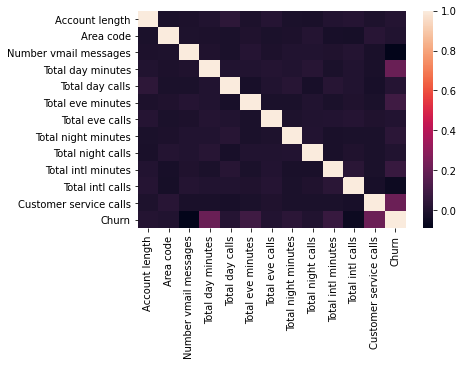

In [54]:
sns.heatmap(df.corr());

In [53]:
df.drop(feat, axis=1, inplace=True)

In [52]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

## 2.2 Колич-катег + колич-бинар

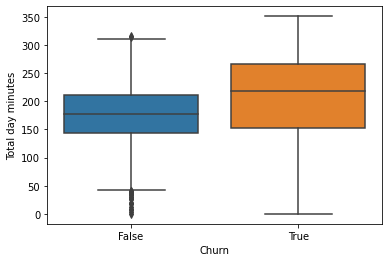

In [55]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);

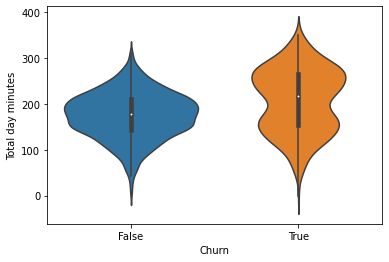

In [56]:
sns.violinplot(x='Churn', y='Total day minutes', data=df);

In [57]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

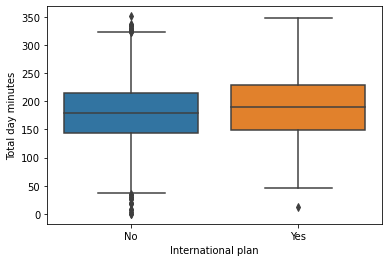

In [58]:
sns.boxplot(x='International plan', y='Total day minutes', data=df);

## 2.3 Катег-катег

In [59]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


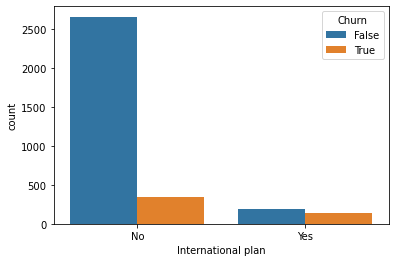

In [60]:
sns.countplot(x='International plan', hue='Churn', data=df);

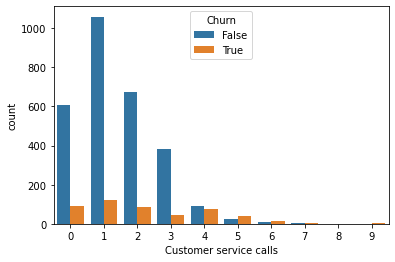

In [62]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

## t-SNE (manifold learning)

In [63]:
from sklearn.manifold import TSNE

In [64]:
TSNE?

In [65]:
tsne = TSNE(random_state=0)

In [66]:
df2 = df.drop('State', axis=1)

In [69]:
df2['International plan'] = df2['International plan'].map({'Yes': 1, 'No': 0})

In [71]:
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total night minutes     3333 non-null   float64
 10  Total night calls       3333 non-null   int64  
 11  Total intl minutes      3333 non-null   float64
 12  Total intl calls        3333 non-null   int64  
 13  Customer service calls  3333 non-null   int64  
 14  Churn                   3333 non-null   

In [73]:
%%time
tsne.fit(df2)

Wall time: 27.4 s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=0, verbose=0)

In [74]:
dir(tsne)

['_EXPLORATION_N_ITER',
 '_N_ITER_CHECK',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fit',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_tsne',
 'angle',
 'early_exaggeration',
 'embedding_',
 'fit',
 'fit_transform',
 'get_params',
 'init',
 'kl_divergence_',
 'learning_rate',
 'method',
 'metric',
 'min_grad_norm',
 'n_components',
 'n_iter',
 'n_iter_',
 'n_iter_without_progress',
 'n_jobs',
 'perplexity',
 'random_state',
 'set_params',
 'verbose']

In [78]:
tsne.embedding_.shape

(3333, 2)

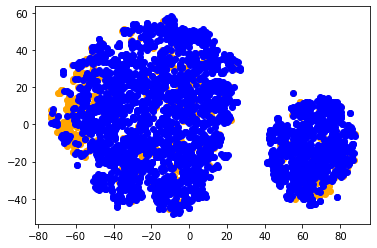

In [87]:
plt.scatter(tsne.embedding_[df2['Churn'].values, 0],
            tsne.embedding_[df2['Churn'].values, 1], color='orange');
plt.scatter(tsne.embedding_[~df2['Churn'].values, 0],
            tsne.embedding_[~df2['Churn'].values, 1], color='blue');

In [84]:
tsne.embedding_[df2['Churn'].values, 0].shape

(483,)